In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

### Visualize Relationship between Age, Balance, and Subscription

This scatter plot shows the distribution of `age` and `balance` for clients, with points colored based on whether they subscribed to a term deposit (`y`). This helps to identify any correlations or clusters among these three variables.

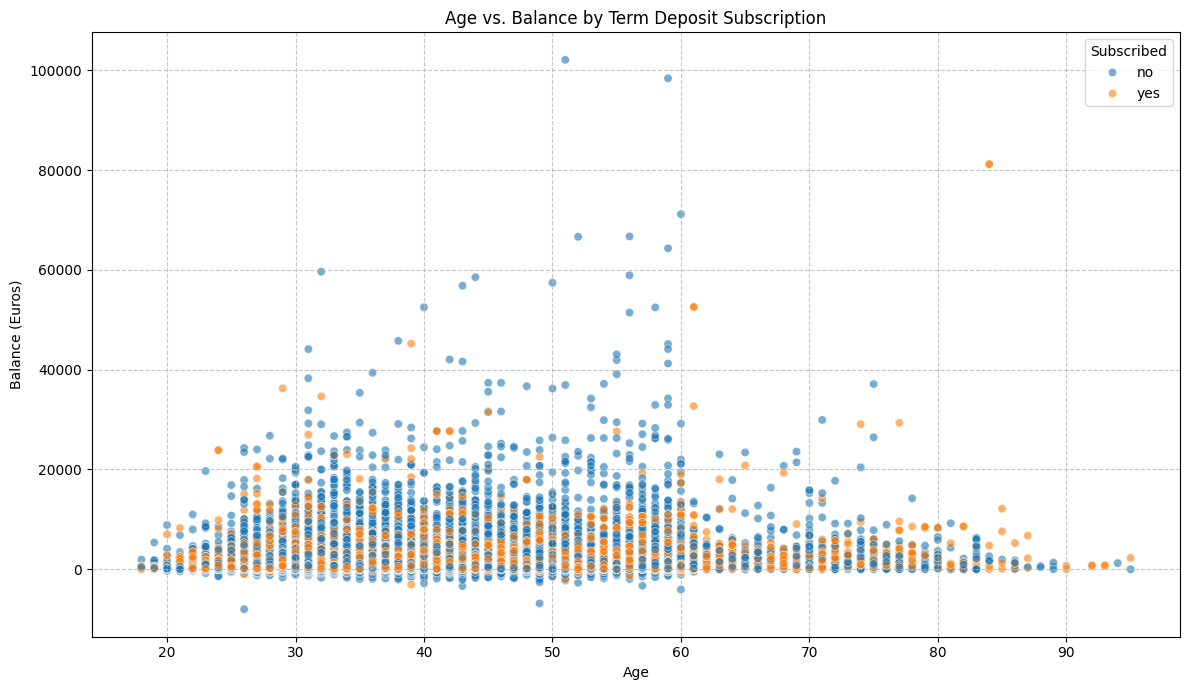

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.scatterplot(data=pd.concat([X[['age', 'balance']], y], axis=1), x='age', y='balance', hue='y', alpha=0.6)
plt.title('Age vs. Balance by Term Deposit Subscription')
plt.xlabel('Age')
plt.ylabel('Balance (Euros)')
plt.legend(title='Subscribed')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Task
Perform a comprehensive exploratory data analysis (EDA) on the `X` (features) and `y` (target) DataFrames. This EDA should include inspecting the data's basic structure, checking for missing values (including 'unknown' for categorical features and -1 for `pdays`), analyzing distributions of both categorical and numerical features, examining the target variable's distribution, and exploring the relationships between key features and the target variable using both tabular summaries and visualizations. Conclude with a comprehensive interpretation of the findings.

## Inspect Data

### Subtask:
Display the first few rows of the features (X) and target (y) DataFrames. Check the data types, number of non-null values, and memory usage for both DataFrames to get an initial understanding of the dataset.


**Reasoning**:
To get an initial understanding of the dataset, I will display the first few rows, data types, non-null values, and memory usage for both the features (X) and target (y) DataFrames.



In [4]:
print("First 5 rows of X (features) DataFrame:")
print(X.head())
print("\nFirst 5 rows of y (target) DataFrame:")
print(y.head())

print("\nInformation about X (features) DataFrame:")
X.info()
print("\nInformation about y (target) DataFrame:")
y.info()

First 5 rows of X (features) DataFrame:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  

First 5 rows of y (target) DataFrame:
    y
0  no
1 

## Check for Missing Values

### Subtask:
Identify and quantify missing values in both `X` and `y` DataFrames. This includes standard NaNs and also 'unknown' values in categorical columns as per the variable information. Note that `pdays` has a special value of -1 for no previous contact.


**Reasoning**:
To identify and quantify missing values as requested, I will first calculate the sum of NaN values for all columns in the `X` DataFrame. This directly addresses the first instruction.



In [5]:
print("Missing NaN values in X (features) DataFrame:")
print(X.isnull().sum())

Missing NaN values in X (features) DataFrame:
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64


**Reasoning**:
To identify missing values represented by the string 'unknown', I will iterate through the categorical columns (object dtype) in the `X` DataFrame and count the occurrences of 'unknown' for each of these columns. This directly addresses the second instruction.



In [6]:
print("\nCounts of 'unknown' in categorical columns of X (features) DataFrame:")
for col in X.select_dtypes(include='object').columns:
    unknown_count = (X[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count}")
    else:
        print(f"{col}: 0 (no 'unknown' values)")


Counts of 'unknown' in categorical columns of X (features) DataFrame:
job: 0 (no 'unknown' values)
marital: 0 (no 'unknown' values)
education: 0 (no 'unknown' values)
default: 0 (no 'unknown' values)
housing: 0 (no 'unknown' values)
loan: 0 (no 'unknown' values)
contact: 0 (no 'unknown' values)
month: 0 (no 'unknown' values)
poutcome: 0 (no 'unknown' values)


**Reasoning**:
To identify missing values specifically for the `pdays` column, I will count the occurrences of the value -1 in this column, as instructed. This addresses the third instruction.



In [7]:
print("\nCounts of -1 in 'pdays' column of X (features) DataFrame:")
print(f"pdays: {(X['pdays'] == -1).sum()}")


Counts of -1 in 'pdays' column of X (features) DataFrame:
pdays: 36954


**Reasoning**:
To confirm there are no missing values in the `y` DataFrame, as instructed, I will calculate the sum of NaN values for all columns in the `y` DataFrame. This directly addresses the fourth instruction.



In [8]:
print("\nMissing NaN values in y (target) DataFrame:")
print(y.isnull().sum())


Missing NaN values in y (target) DataFrame:
y    0
dtype: int64


## Analyze Categorical Features

### Subtask:
For each categorical feature in X, display the unique values and their counts. This helps understand the distribution within each category.


**Reasoning**:
To analyze categorical features, I will iterate through all columns in the 'X' DataFrame that have an 'object' data type, and for each of these columns, I will print the unique values and their counts using the `.value_counts()` method.



In [9]:
print("\nUnique values and counts for categorical features in X (features) DataFrame:")
for col in X.select_dtypes(include='object').columns:
    print(f"\n--- {col} ---")
    print(X[col].value_counts(dropna=False))


Unique values and counts for categorical features in X (features) DataFrame:

--- job ---
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: count, dtype: int64

--- marital ---
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

--- education ---
education
secondary    23202
tertiary     13301
primary       6851
NaN           1857
Name: count, dtype: int64

--- default ---
default
no     44396
yes      815
Name: count, dtype: int64

--- housing ---
housing
yes    25130
no     20081
Name: count, dtype: int64

--- loan ---
loan
no     37967
yes     7244
Name: count, dtype: int64

--- contact ---
contact
cellular     29285
NaN          13020
telephone     2906
Name: count, dtype: int64

--- month ---
month
may    13766
jul     6895

## Analyze Numerical Features

### Subtask:
For each numerical feature in `X`, display descriptive statistics (mean, median, standard deviation, min, max, quartiles). This provides a summary of the distribution and potential outliers.

**Reasoning**:
To analyze the numerical features, I will use the `.describe()` method on the `X` DataFrame, which automatically calculates descriptive statistics for all numerical columns.



In [10]:
print("Descriptive statistics for numerical features in X (features) DataFrame:")
print(X.describe())

Descriptive statistics for numerical features in X (features) DataFrame:
                age        balance   day_of_week      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0

## Analyze Target Variable Distribution

### Subtask:
Examine the distribution of the target variable `y` by displaying its unique values and their counts. This will reveal the balance of the classes and indicate if there is a class imbalance problem.

**Reasoning**:
To examine the distribution of the target variable `y`, I will display its unique values and their counts using `value_counts()`.



In [11]:
print("\nUnique values and counts for y (target) DataFrame:")
print(y['y'].value_counts())


Unique values and counts for y (target) DataFrame:
y
no     39922
yes     5289
Name: count, dtype: int64


## Explore Relationships Between Features and Target Variable

### Subtask:
Analyze the relationship between selected categorical features and the target variable `y` using tabular summaries. This will help identify how different categories within features relate to the likelihood of subscribing to a term deposit.

### Instructions:
1. Select a few key categorical features from `X` (e.g., 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome').
2. For each selected categorical feature, cross-tabulate it with the target variable `y`.
3. Calculate the proportion of 'yes' and 'no' for `y` within each category of the feature.
4. Display these proportions as tabular summaries.

**Reasoning**:
To analyze the relationship between selected categorical features and the target variable, I will iterate through a predefined list of key categorical features. For each feature, I will create a cross-tabulation with the target variable 'y', normalize it to show proportions, and then display the results. This directly addresses the subtask's instructions for tabular summaries.



In [12]:
import pandas as pd

categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

for feature in categorical_features:
    print(f"\n--- Relationship between {feature} and y ---")
    # Combine X and y for easier cross-tabulation
    df_combined = pd.concat([X[feature], y], axis=1)

    # Create a cross-tabulation
    crosstab = pd.crosstab(df_combined[feature], df_combined['y'])

    # Calculate proportions of 'yes' and 'no' for y within each category of the feature
    proportions = crosstab.div(crosstab.sum(1).astype(float), axis=0)

    print(proportions)



--- Relationship between job and y ---
y                    no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027

--- Relationship between marital and y ---
y               no       yes
marital                     
divorced  0.880545  0.119455
married   0.898765  0.101235
single    0.850508  0.149492

--- Relationship between education and y ---
y                no       yes
education                    
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849936  0.150064

--- Relationship between housing and y ---
y              no       yes
housing                    
no       0.832976  0.167024
yes  

### Subtask:
Visualize the relationship between selected categorical features and the target variable `y` using bar plots. This will visually highlight how different categories influence the likelihood of subscribing to a term deposit.

### Instructions:
1. Select a few key categorical features from `X` (e.g., 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome').
2. For each selected categorical feature, create a bar plot that shows the proportion of 'yes' and 'no' for `y` within each category of the feature.
3. Ensure plots have appropriate titles, labels, and legends for clarity.

**Reasoning**:
To visualize the relationships between categorical features and the target variable, I will iterate through the predefined list of categorical features. For each feature, I will create a cross-tabulation with the target variable 'y', normalize it to show proportions, and then plot these proportions as a stacked bar chart to visually represent the likelihood of 'yes' vs 'no' for the term deposit.



<Figure size 1000x600 with 0 Axes>

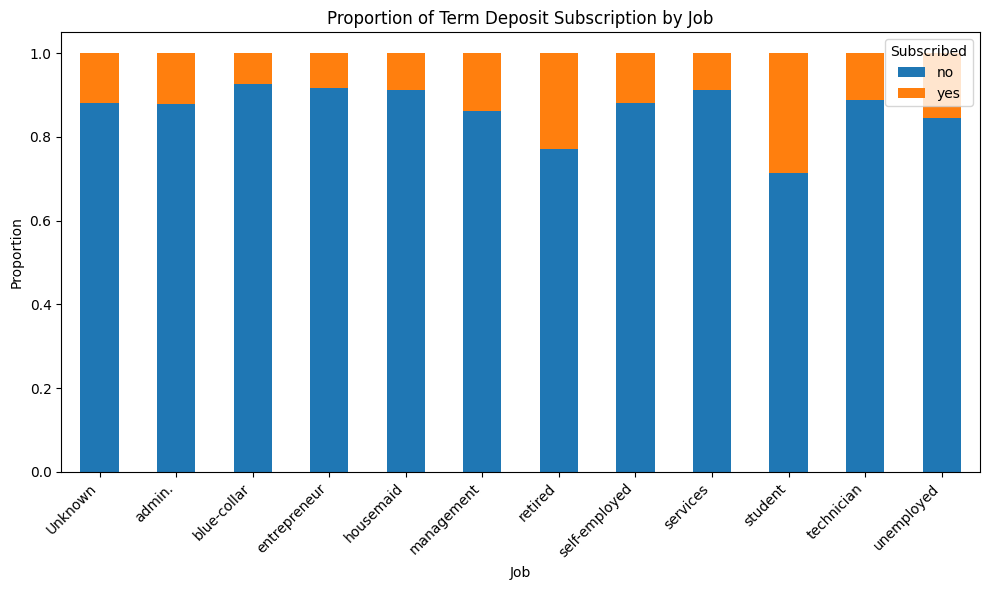

<Figure size 1000x600 with 0 Axes>

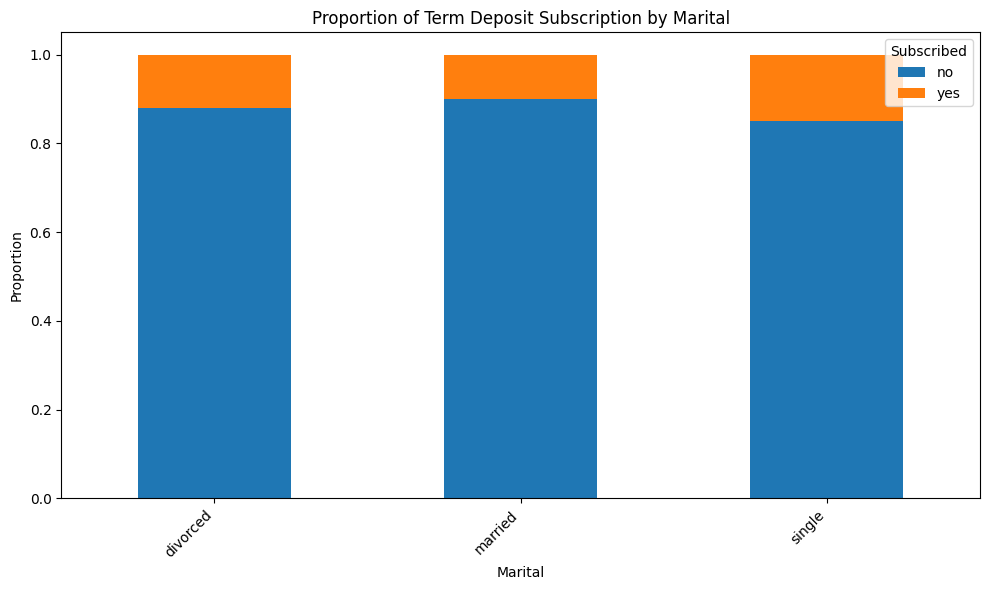

<Figure size 1000x600 with 0 Axes>

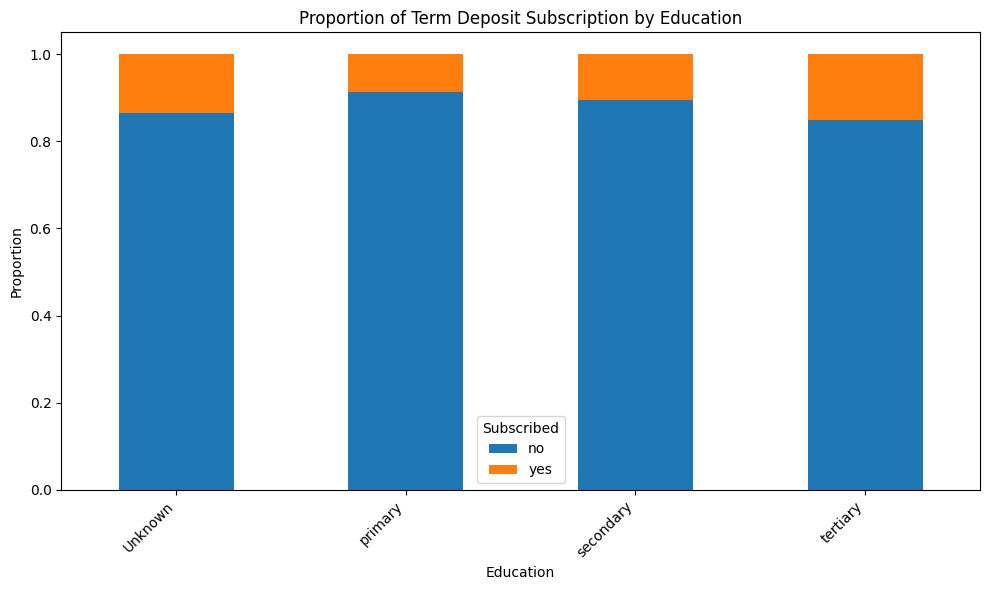

<Figure size 1000x600 with 0 Axes>

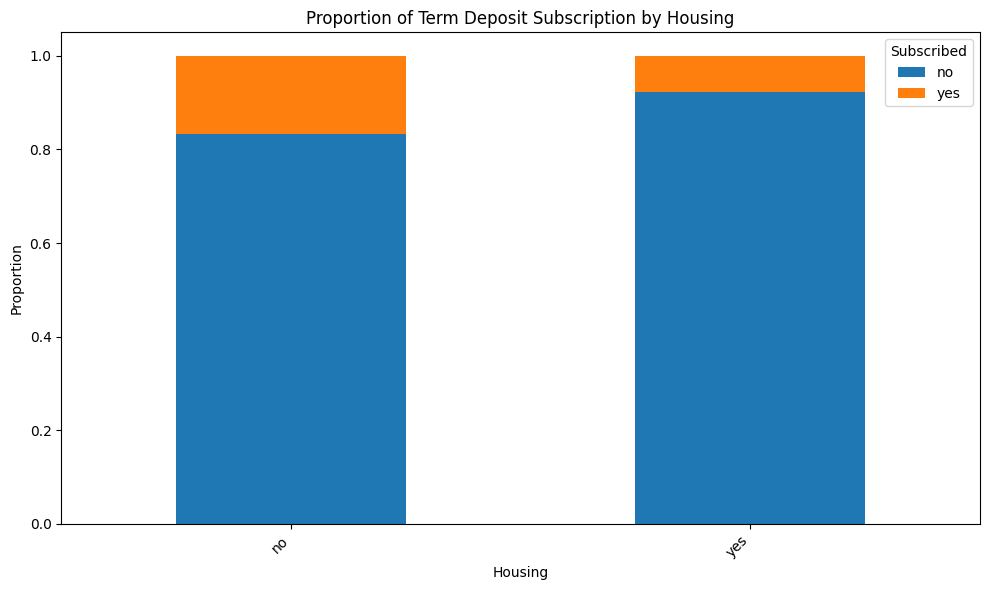

<Figure size 1000x600 with 0 Axes>

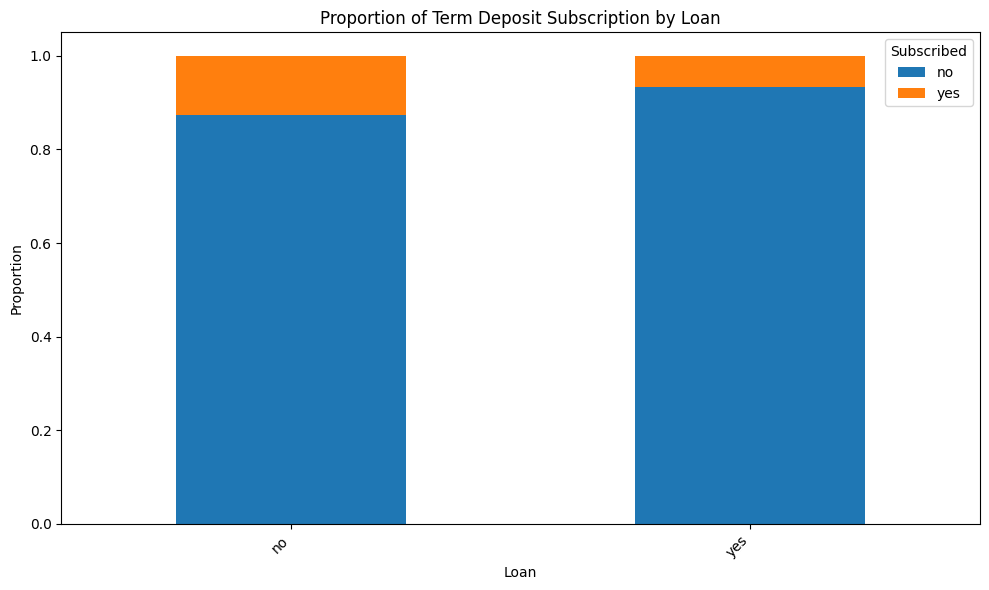

<Figure size 1000x600 with 0 Axes>

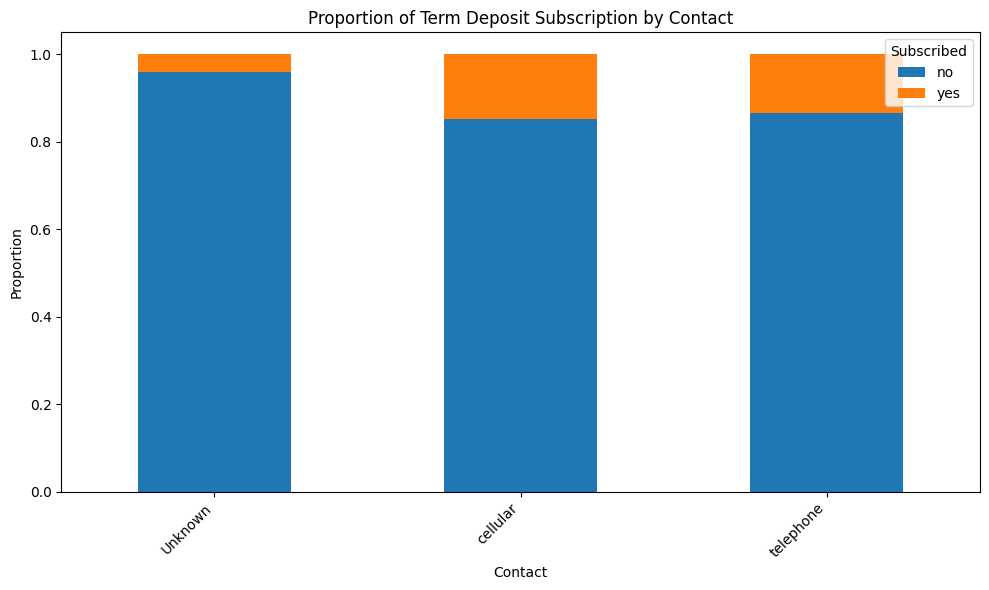

<Figure size 1000x600 with 0 Axes>

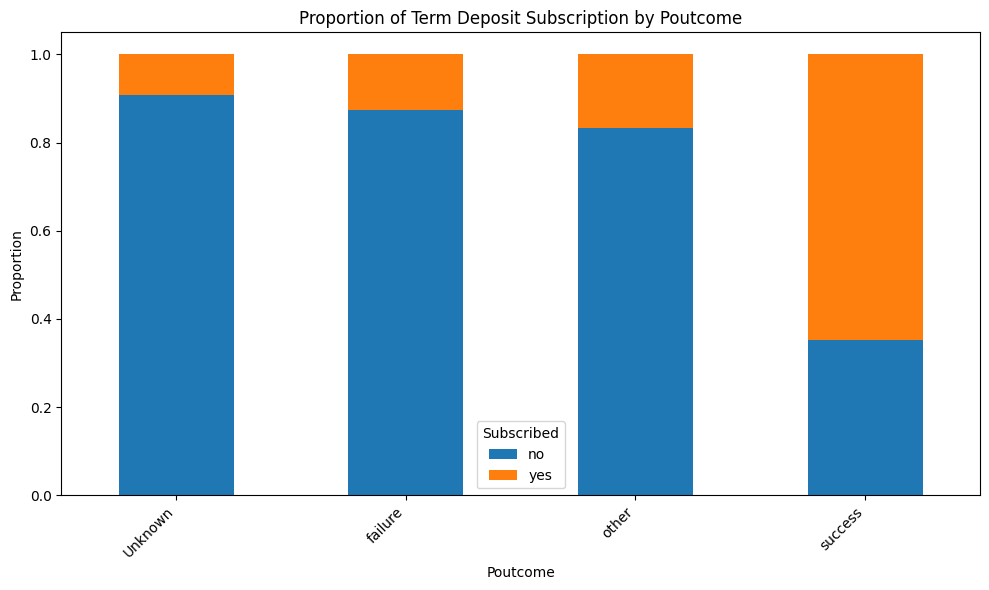

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    df_combined = pd.concat([X[feature], y], axis=1)

    # Handle NaN values in the feature column before value_counts and crosstab
    # Replace NaN with 'Unknown' for plotting if necessary, or drop if preferred.
    # For this visualization, replacing with 'Unknown' is generally better than dropping.
    if df_combined[feature].isnull().any():
        df_combined[feature] = df_combined[feature].fillna('Unknown')

    crosstab = pd.crosstab(df_combined[feature], df_combined['y'], normalize='index')

    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Proportion of Term Deposit Subscription by {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Subscribed')
    plt.tight_layout()
    plt.show()

### Subtask:
Visualize the relationship between selected numerical features and the target variable `y` using distribution plots (e.g., histograms or box plots). This will help understand how the distribution of numerical features differs between clients who subscribed ('yes') and those who did not ('no').

### Instructions:
1. Select a few key numerical features from `X` (e.g., 'age', 'balance', 'duration', 'campaign', 'pdays', 'previous').
2. For each selected numerical feature, create a plot (e.g., a histogram with `hue` or `kdeplot`, or box plot) that shows the distribution of the feature, segmented by the target variable `y`.
3. Ensure plots have appropriate titles, labels, and legends for clarity.

**Reasoning**:
To visualize the relationships between numerical features and the target variable, I will iterate through a predefined list of numerical features. For each feature, I will create a plot (e.g., a histogram or a box plot) that shows its distribution, segmented by the target variable 'y', to compare the 'yes' and 'no' groups.



/tmp/ipython-input-1909375824.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Subscribed')


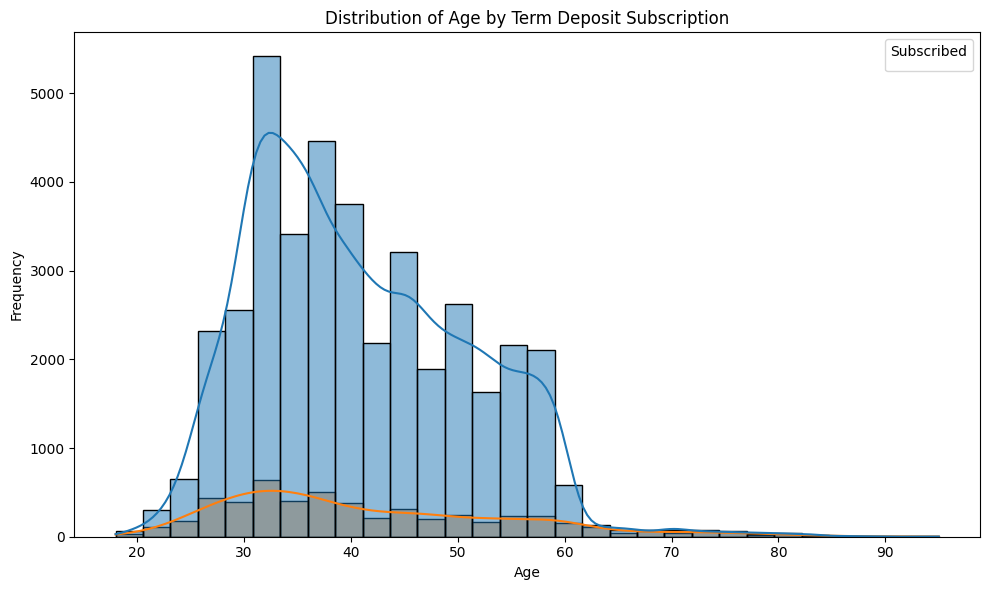

/tmp/ipython-input-1909375824.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Subscribed')


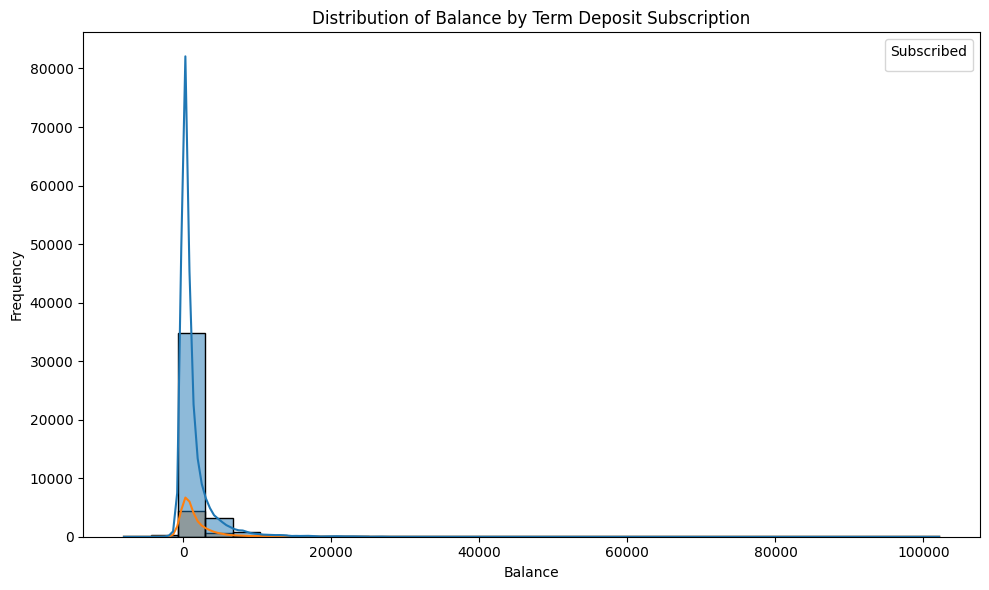

/tmp/ipython-input-1909375824.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Subscribed')


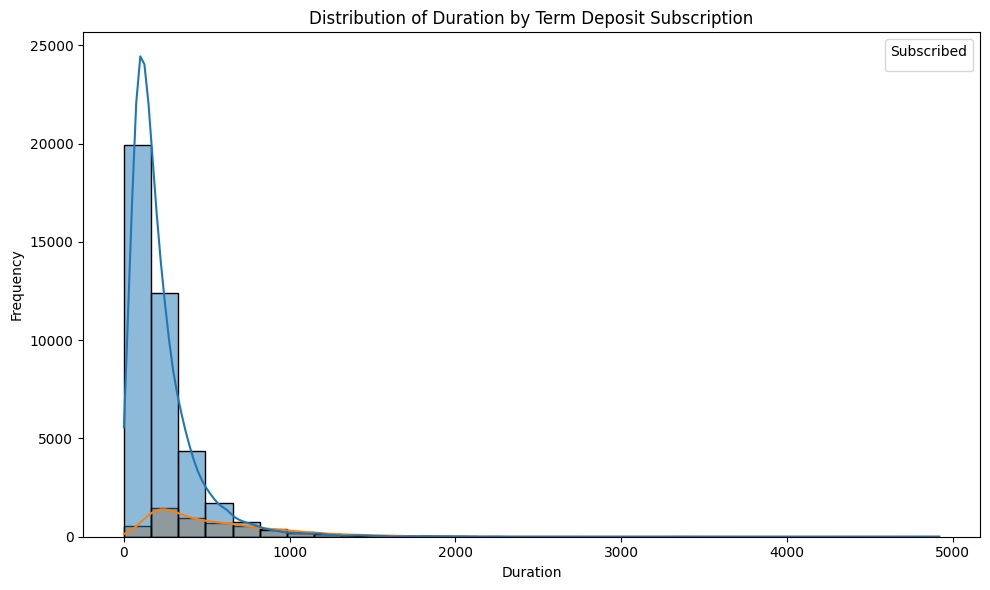

/tmp/ipython-input-1909375824.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Subscribed')


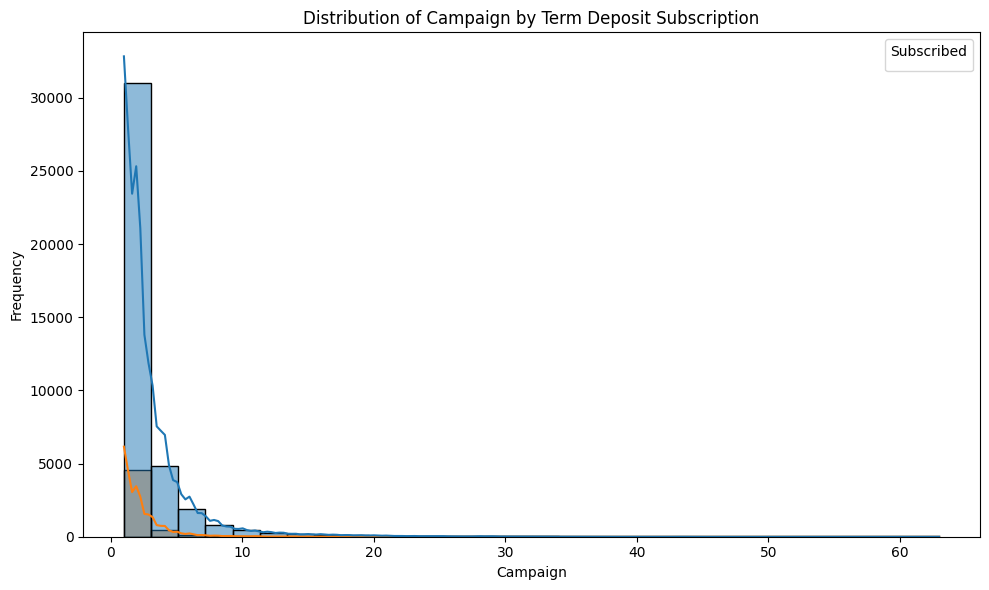

/tmp/ipython-input-1909375824.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Subscribed')


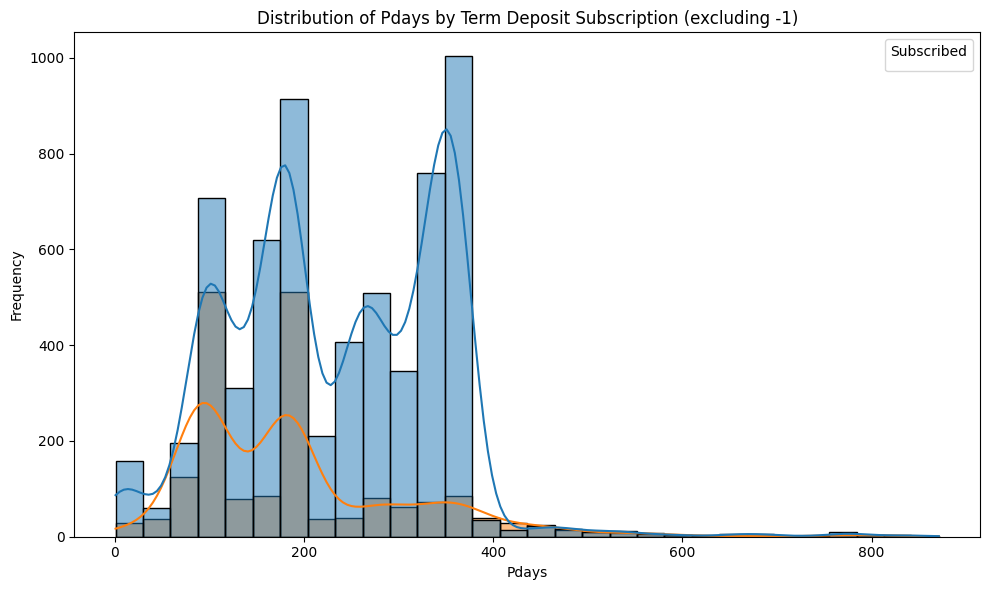

/tmp/ipython-input-1909375824.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Subscribed')


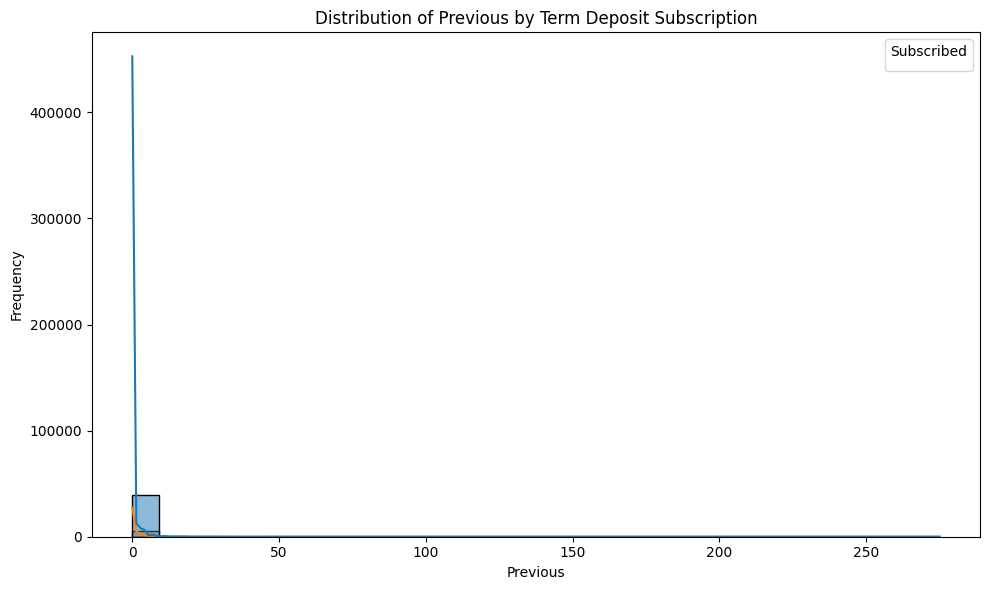

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    df_combined = pd.concat([X[feature], y], axis=1)

    # For numerical features, a KDE plot or histplot with hue is suitable
    # Or a boxplot to show distribution and outliers per target class

    if feature in ['pdays']:
        # For pdays, filter out -1 before plotting as it signifies no prior contact
        df_plot = df_combined[df_combined[feature] != -1]
        sns.histplot(data=df_plot, x=feature, hue='y', kde=True, bins=30)
        plt.title(f'Distribution of {feature.replace("_", " ").title()} by Term Deposit Subscription (excluding -1)')
    elif feature in ['age', 'balance', 'duration', 'campaign', 'previous']:
        sns.histplot(data=df_combined, x=feature, hue='y', kde=True, bins=30)
        plt.title(f'Distribution of {feature.replace("_", " ").title()} by Term Deposit Subscription')

    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.legend(title='Subscribed')
    plt.tight_layout()
    plt.show()

**Reasoning**:
The previous code generated a `UserWarning` because `sns.histplot` typically handles the legend automatically when `hue` is specified. Calling `plt.legend()` explicitly without providing handles can lead to this warning. I will remove the redundant `plt.legend()` call to allow seaborn to manage the legend correctly.



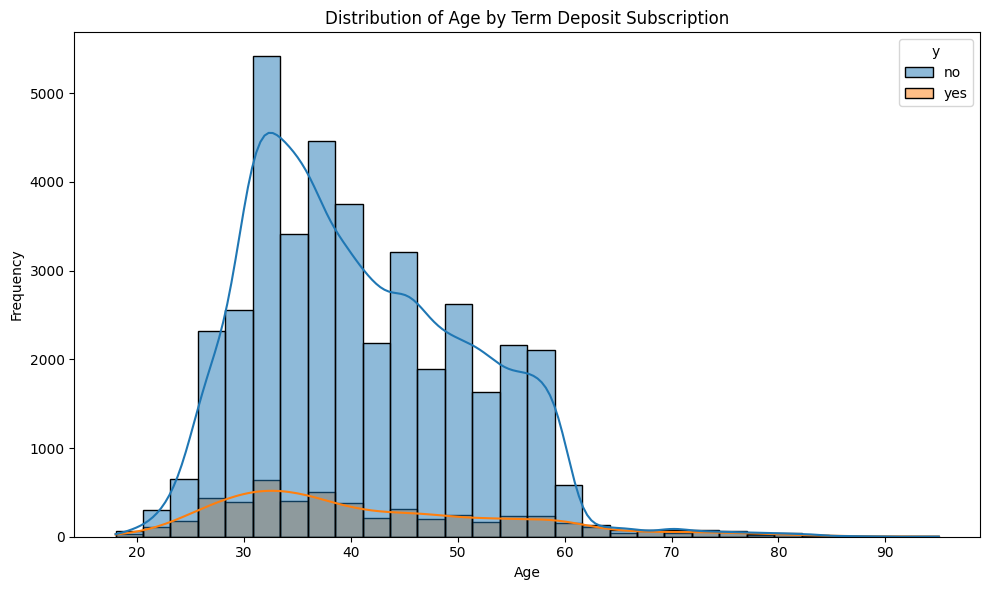

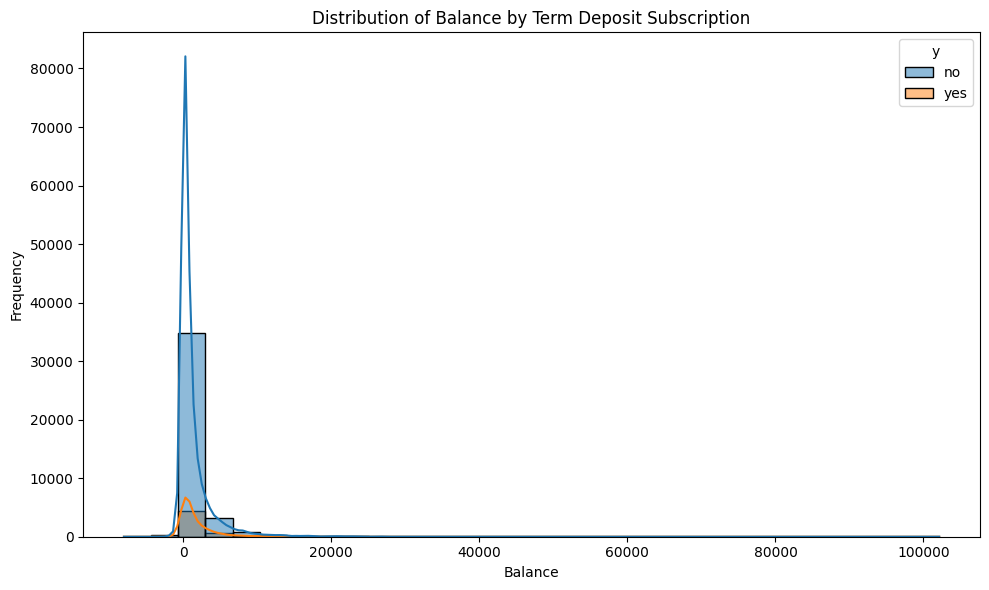

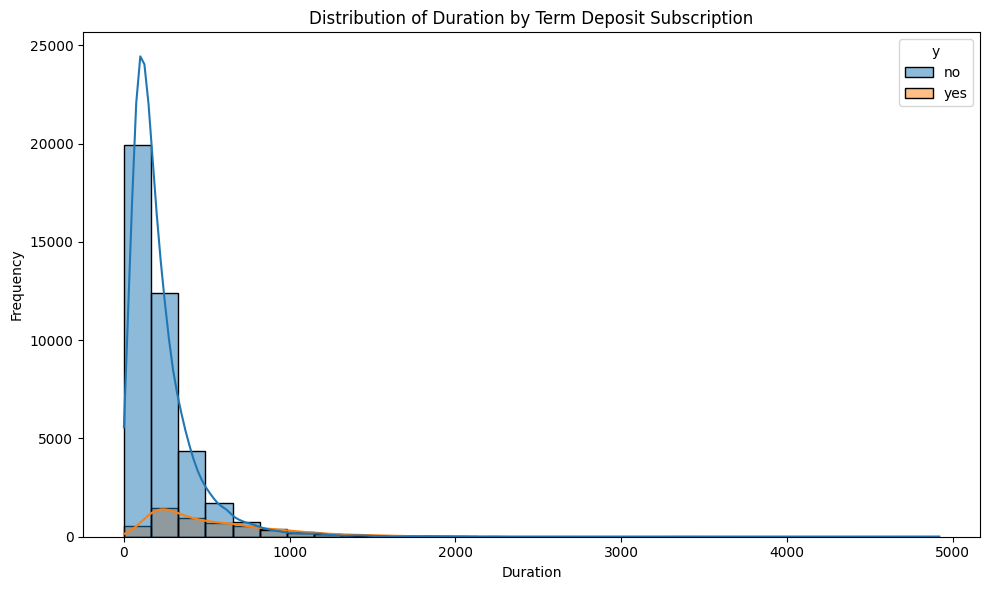

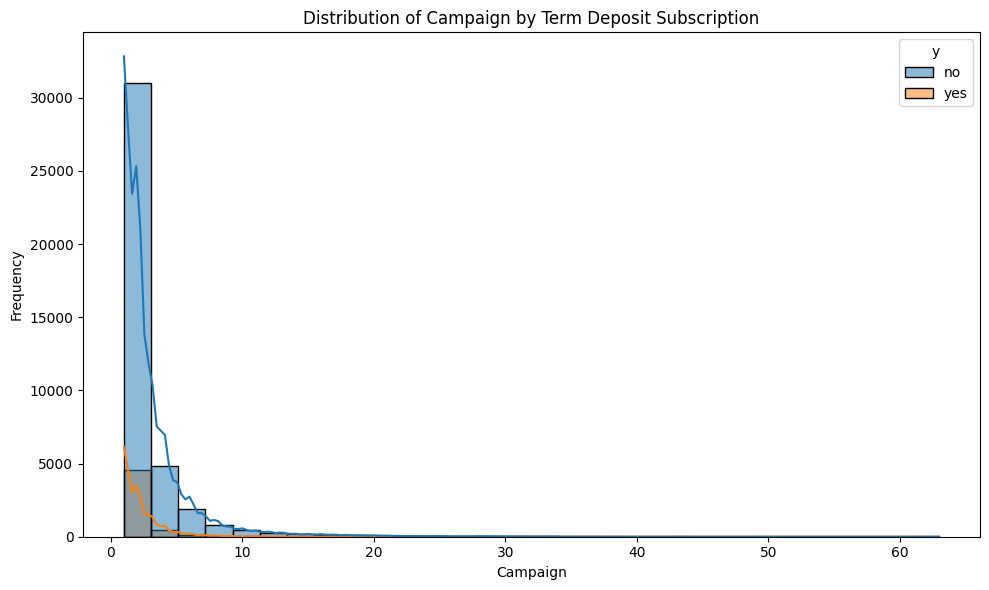

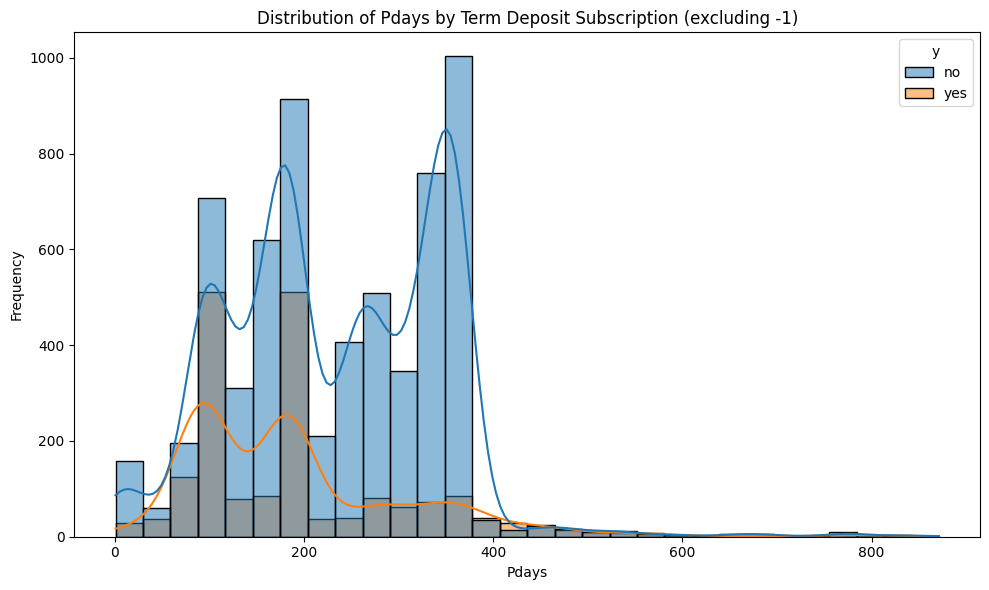

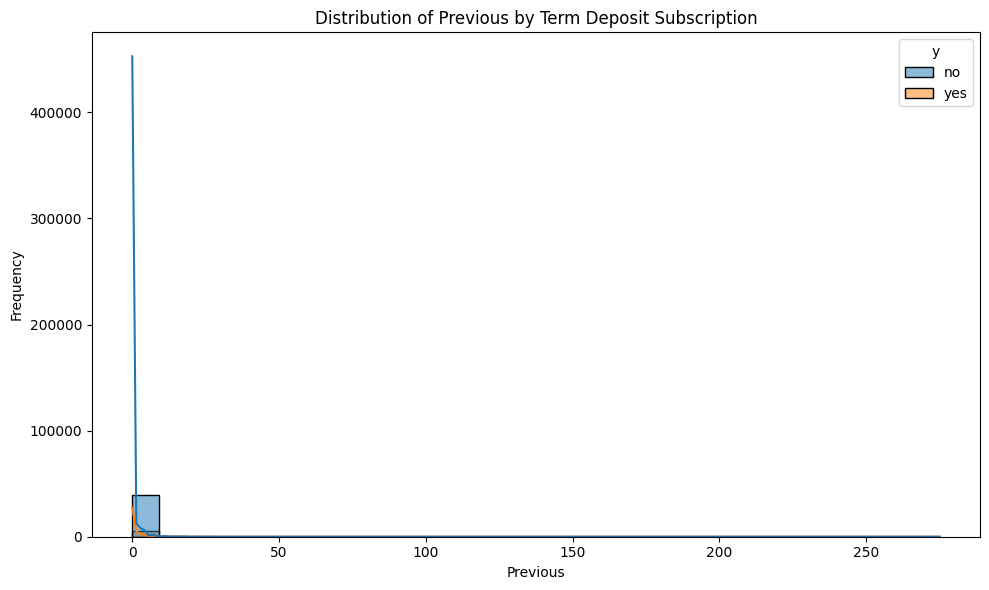

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    df_combined = pd.concat([X[feature], y], axis=1)

    # For numerical features, a KDE plot or histplot with hue is suitable
    # Or a boxplot to show distribution and outliers per target class

    if feature in ['pdays']:
        # For pdays, filter out -1 before plotting as it signifies no prior contact
        df_plot = df_combined[df_combined[feature] != -1]
        sns.histplot(data=df_plot, x=feature, hue='y', kde=True, bins=30)
        plt.title(f'Distribution of {feature.replace("_", " ").title()} by Term Deposit Subscription (excluding -1)')
    elif feature in ['age', 'balance', 'duration', 'campaign', 'previous']:
        sns.histplot(data=df_combined, x=feature, hue='y', kde=True, bins=30)
        plt.title(f'Distribution of {feature.replace("_", " ").title()} by Term Deposit Subscription')

    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')
    # Removed plt.legend(title='Subscribed') as sns.histplot handles it automatically with hue.
    plt.tight_layout()
    plt.show()

## Interpretation of Findings

Based on the exploratory data analysis, here are the key insights:

**1. Data Structure and Missing Values:**
- The dataset contains 45,211 entries and 16 features in `X` and 1 target variable `y`.
- `X` has a mix of numerical (`int64`) and categorical (`object`) features.
- Missing values are present in `job`, `education`, `contact`, and `poutcome` columns (represented as NaN). `pdays` has a significant number of -1 values, indicating no prior contact.
- The `y` (target) DataFrame has no missing values.

**2. Target Variable Distribution (y):**
- The target variable `y` ('y' column) shows a significant class imbalance:
  - 'no': 39,922 (approx. 88.3%)
  - 'yes': 5,289 (approx. 11.7%)
- This imbalance needs to be addressed during model training to avoid biased predictions.

**3. Categorical Features Analysis:**
- **Job**: 'blue-collar' is the most frequent job type, followed by 'management' and 'technician'. 'Student' and 'retired' categories show higher subscription rates for term deposits (28.7% and 22.8% respectively) compared to the overall average. 'Blue-collar' and 'entrepreneur' have lower subscription rates (around 7-8%).
- **Marital Status**: 'Single' individuals have a slightly higher subscription rate (14.9%) than 'married' (10.1%) and 'divorced' (11.9%) individuals.
- **Education**: Clients with 'tertiary' education have the highest subscription rate (15.0%), followed by 'secondary' (10.6%), and 'primary' (8.6%).
- **Default**: Very few clients have credit in default (815 out of 45211). Those with no default have a higher subscription rate.
- **Housing Loan**: Clients without a housing loan show a significantly higher subscription rate (16.7%) compared to those with a housing loan (7.7%).
- **Personal Loan**: Similar to housing loans, clients without a personal loan have a higher subscription rate (12.7%) than those with a loan (6.7%).
- **Contact**: The 'cellular' contact type has a higher proportion of 'yes' subscriptions (14.9%) than 'telephone' (13.4%). A large portion of contacts are missing/unknown (represented as NaN in the initial `X.info()` output, and handled as 'Unknown' in plots), suggesting many clients were not contacted through specific channels, or the information was not recorded.
- **Poutcome (Outcome of Previous Campaign)**: This feature is highly indicative. 'Success' in a previous campaign leads to a dramatically higher subscription rate (64.7%) in the current campaign. 'Unknown' outcomes (which account for the majority of the data due to many clients not being contacted previously, or result not recorded) have a low success rate. 'Other' and 'failure' also have low success rates (16.7% and 12.6% respectively).

**4. Numerical Features Analysis:**
- **Age**: The distribution of age is right-skewed, with most clients being between 30 and 50. Younger clients (students) and older clients (retired) tend to have higher subscription rates, as observed in the `job` analysis. The 'yes' group appears to have slightly more individuals in the younger and older age brackets, creating a bimodal-like distribution compared to the 'no' group.
- **Balance**: The `balance` feature has a wide range, including negative values, and is highly right-skewed, indicating a few clients with very high balances. Clients who subscribe ('yes') tend to have slightly higher balances on average, though there's significant overlap with the 'no' group.
- **Duration**: `duration` of the last contact has a strong positive correlation with subscription, with 'yes' subscriptions concentrating at higher durations. This is a critical feature but might not be available before a call, suggesting it's more of a post-hoc indicator.
- **Campaign**: Most clients were contacted only once or twice. Clients contacted fewer times ('campaign' = 1 or 2) have a slightly higher chance of subscribing. As the number of contacts increases, the subscription rate generally decreases.
- **Pdays**: The majority of `pdays` values are -1, meaning no previous contact. For clients who were contacted previously (`pdays` > -1), the 'yes' subscriptions tend to occur when `pdays` is smaller, suggesting that recent previous contact is more effective.
- **Previous**: Most clients had 0 previous contacts. A higher number of previous contacts generally does not directly translate to higher subscription, as the 'poutcome' matters more.

**Summary of key observations:**
- **Class Imbalance**: The target variable `y` is highly imbalanced, which needs to be addressed.
- **Missing Data**: Several columns have significant missing values, which will require imputation or careful handling.
- **Strong Predictors**: 'duration', 'poutcome', 'housing', 'loan', 'job' (especially student/retired), 'education' (tertiary), and 'age' (younger/older) appear to be strong indicators for term deposit subscription.
- **'Duration' is a problematic feature for prediction** as it is known after the outcome.
- **'pdays' value of -1** needs special handling as it signifies 'no previous contact', not a numerical value.

These insights will guide the subsequent data preprocessing and model building steps.

## Final Task

### Subtask:
Provide a comprehensive interpretation of the data, summarizing the key findings from the tabular representations and visualizations. Highlight important patterns, distributions, and potential relationships between features and the target variable.


## Summary:

### Data Analysis Key Findings

*   The dataset comprises 45,211 entries with 16 features (`X`) and one target variable (`y`). `X` contains a mix of numerical (`int64`) and categorical (`object`) data types, while `y` is of `object` type.
*   **Missing Values**: Significant missing values (NaN) are present in `job` (288), `education` (1,857), `contact` (13,020), and `poutcome` (36,959) columns in the `X` DataFrame. The `pdays` column has 36,954 entries with a value of -1, indicating no previous contact. The target variable `y` has no missing values.
*   **Target Variable Imbalance**: The target variable `y` is highly imbalanced, with 'no' responses accounting for approximately 88.3% (39,922 entries) and 'yes' responses for about 11.7% (5,289 entries).
*   **Categorical Feature Impact**:
    *   Clients in 'student' (28.7%) and 'retired' (22.8%) job categories show substantially higher subscription rates compared to the overall average. Conversely, 'blue-collar' and 'entrepreneur' roles have lower rates (7-8%).
    *   Individuals without a 'housing loan' (16.7%) or 'personal loan' (12.7%) exhibit significantly higher subscription rates than those with such loans (7.7% and 6.7% respectively).
    *   A 'successful' outcome in a previous campaign (`poutcome`) is a very strong predictor, leading to a 64.7% subscription rate in the current campaign.
    *   'Tertiary' education (15.0%) correlates with a higher subscription rate than 'secondary' (10.6%) or 'primary' (8.6%) education.
*   **Numerical Feature Insights**:
    *   **Duration**: The `duration` of the last contact shows a strong positive correlation with subscription, with 'yes' subscriptions concentrating at longer durations.
    *   **Age**: Younger clients (students) and older clients (retired) tend to have higher subscription rates, creating a bimodal-like distribution for subscribers.
    *   **Balance**: Subscribers ('yes' group) tend to have slightly higher average account balances.
    *   **Campaign**: Clients contacted fewer times (1 or 2) show a slightly higher subscription probability.
    *   **Pdays**: For clients previously contacted (`pdays` > -1), a shorter `pdays` (more recent contact) is associated with higher subscription rates.

### Insights or Next Steps

*   The significant class imbalance in the target variable `y` must be addressed during model training to prevent biased predictions.
*   The large number of missing values and the special handling required for `-1` in `pdays` and `NaN`s in categorical features necessitate careful data imputation or preprocessing strategies before model building.
